
# Visualizing Quantum States in Qiskit 2.x

This notebook walks through the most useful visualization tools for quantum **states** (and related results) in Qiskit 2.x.

**Topics covered**
- `bloch_sphere_concepts`: what the Bloch sphere represents; convert between (θ,φ), |ψ⟩, and (x,y,z)
- `plot_bloch_vector`
- `plot_bloch_multivector`
- `plot_state_qsphere`
- `plot_state_hinton`
- `plot_state_city`
- `plot_state_paulivec`
- `plot_histogram`

> **Requirements**: Install with visualization extras if needed:
> ```bash
> pip install "qiskit[visualization]"
> ```
> Some optional sections use Aer; if you want to run those cells:
> ```bash
> pip install qiskit-aer
> ```


In [1]:
# Setup: imports used across the notebook
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, DensityMatrix, SparsePauliOp, partial_trace
from qiskit.visualization import (
    plot_bloch_vector,
    plot_bloch_multivector,
    plot_state_qsphere,
    plot_state_hinton,
    plot_state_city,
    plot_state_paulivec,
    plot_histogram,
)
# %matplotlib inline  # Usually auto-enabled in JupyterLab; uncomment if needed.
from IPython.display import display



## 0) Bloch sphere concepts

A single-qubit pure state can be written (up to a global phase) as
|ψ⟩ = cos(θ/2)|0⟩ + e^{iφ} sin(θ/2)|1⟩.  
Its **Bloch vector** r = (x, y, z) is
x = sinθ cosφ,  y = sinθ sinφ,  z = cosθ.

For a general state ρ (pure or mixed), the Bloch components are expectation values:
x = ⟨X⟩ = Tr(ρX),  y = ⟨Y⟩,  z = ⟨Z⟩,
and physical states satisfy ‖r‖ ≤ 1 (pure states have ‖r‖ = 1).


In [2]:

def bloch_from_statevector(sv: Statevector):
    """Return (x,y,z) for a 1-qubit Statevector sv."""
    x = float(np.real(sv.expectation_value(SparsePauliOp('X'))))
    y = float(np.real(sv.expectation_value(SparsePauliOp('Y'))))
    z = float(np.real(sv.expectation_value(SparsePauliOp('Z'))))
    return x, y, z

def state_from_angles(theta: float, phi: float) -> Statevector:
    """Construct |psi> = cos(theta/2)|0> + e^{i phi} sin(theta/2)|1> as a Statevector."""
    alpha = np.cos(theta/2)
    beta = np.exp(1j*phi)*np.sin(theta/2)
    vec = np.array([alpha, beta], dtype=complex)
    return Statevector(vec/np.linalg.norm(vec))

# Demo: a point at +Y (theta=pi/2, phi=pi/2) should yield (0,1,0)
sv_demo = state_from_angles(np.pi/2, np.pi/2)
bloch_from_statevector(sv_demo)


(6.123233995736766e-17, 1.0, 2.220446049250313e-16)

## 1) `plot_bloch_vector` — plot a **single** Bloch vector

- Input: a 3-tuple/list `(x, y, z)` with ‖r‖ ≤ 1.
- Use when you already know the Bloch components, or after converting from a `Statevector`/`DensityMatrix`.

**Common gotcha**: `plot_bloch_vector` does **not** take a `Statevector` directly.

Here **r** denotes the Bloch vector **r = (x, y, z)**.


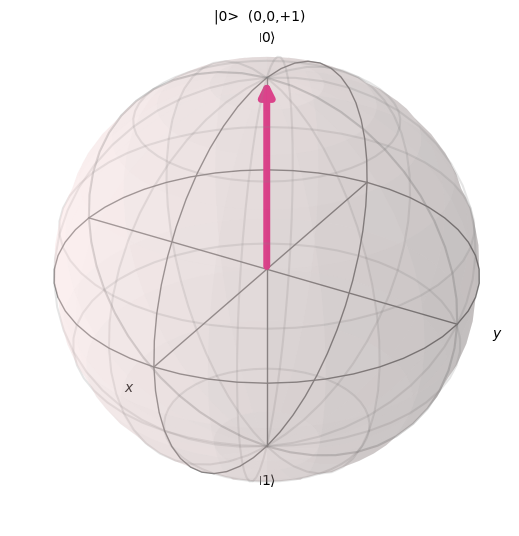

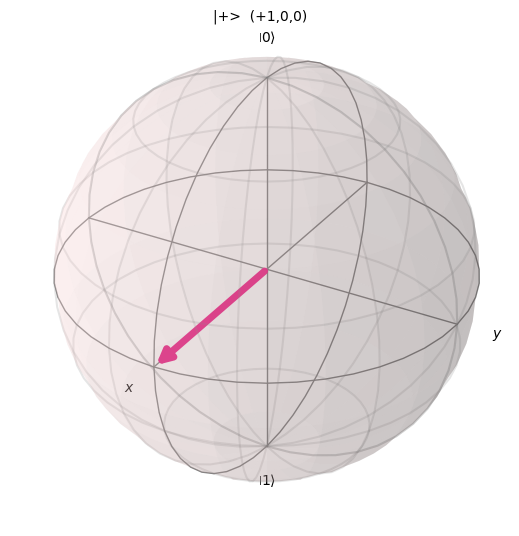

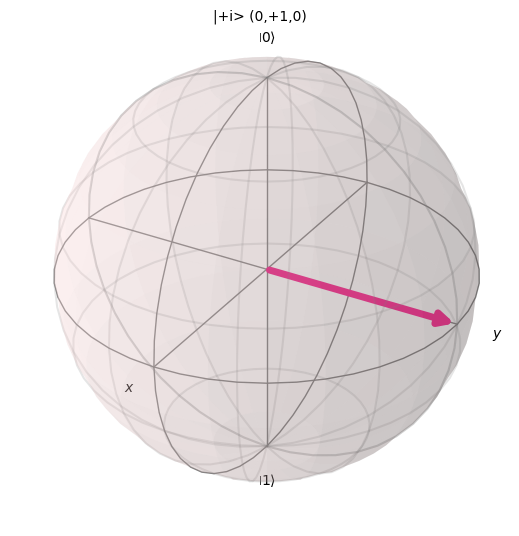

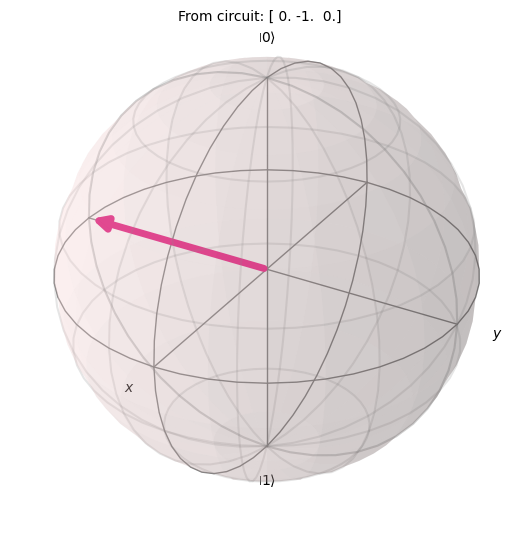

In [3]:

# Example A: pure states on principal axes
fig1 = plot_bloch_vector([0, 0, 1], title="|0>  (0,0,+1)")
fig2 = plot_bloch_vector([1, 0, 0], title="|+>  (+1,0,0)")
fig3 = plot_bloch_vector([0, 1, 0], title="|+i> (0,+1,0)")

# Example B: convert from a circuit's statevector
qc = QuantumCircuit(1); qc.rx(np.pi/2, 0)   # |0> --Rx(pi/2)--> (0,-1,0)
sv = Statevector.from_instruction(qc)
vec = bloch_from_statevector(sv)
fig4 = plot_bloch_vector(vec, title=f"From circuit: {np.round(vec,3)}")
display(fig1); display(fig2); display(fig3); display(fig4)



## 2) `plot_bloch_multivector` — per-qubit Bloch spheres from a state

- Input: a `Statevector` or `DensityMatrix` (1 or more qubits).
- Output: one Bloch sphere **per qubit** (the reduced state for each qubit).
- Entangled states show **shrunk** (often centered) local Bloch vectors—e.g., Bell states give local vectors near (0,0,0).


In [4]:

# Single-qubit example (pure): should show a point at -Y
qc1 = QuantumCircuit(1); qc1.rx(np.pi/2, 0)
sv1 = Statevector.from_instruction(qc1)
fig5 = plot_bloch_multivector(sv1)

# Two-qubit Bell state: local Bloch vectors are (0,0,0)
qc2 = QuantumCircuit(2); qc2.h(0); qc2.cx(0,1)
sv2 = Statevector.from_instruction(qc2)
fig6 = plot_bloch_multivector(sv2)
(fig5, fig6)


(<Figure size 480x480 with 1 Axes>, <Figure size 960x480 with 2 Axes>)


## 3) `plot_state_qsphere` — amplitude & phase on the Qsphere

- Visualizes a statevector’s amplitudes as points on a sphere with color/phase and size (probability).
- Great for multi-qubit superpositions.


In [5]:

# Qsphere for |Φ+> = (|00> + |11>)/√2
qc_qs = QuantumCircuit(2); qc_qs.h(0); qc_qs.cx(0,1)
sv_qs = Statevector.from_instruction(qc_qs)
fig7 = plot_state_qsphere(sv_qs)
fig7


MissingOptionalLibraryError: "The 'seaborn' library is required to use 'plot_state_qsphere'. You can install it with 'pip install seaborn'."


## 4) `plot_state_hinton` — Hinton diagram of the density matrix ρ

- Input: `Statevector` or `DensityMatrix`; plots the density matrix (magnitude/sign as squares).
- Useful for spotting structure/blocks and coherence.


In [ ]:

# Single-qubit pure vs mixed (partial trace of a Bell state)
qc_pure = QuantumCircuit(1); qc_pure.h(0)
sv_pure = Statevector.from_instruction(qc_pure)

qc_bell = QuantumCircuit(2); qc_bell.h(0); qc_bell.cx(0,1)
rho_bell = DensityMatrix.from_instruction(qc_bell)
rho_mixed_q0 = partial_trace(rho_bell, [1])  # trace out qubit 1

fig8 = plot_state_hinton(sv_pure)      # uses ρ = |ψ><ψ|
fig9 = plot_state_hinton(rho_mixed_q0) # maximally mixed: equal squares on diagonal
(fig8, fig9)



## 5) `plot_state_city` — “cityscape” bars for ρ (real/imag parts)

- Input: `Statevector` or `DensityMatrix`.
- Shows real and imaginary components of the density matrix as 3D bar charts.


In [ ]:

fig10 = plot_state_city(sv_pure)       # pure state from Section 4
fig11 = plot_state_city(rho_mixed_q0)  # reduced mixed state
(fig10, fig11)



## 6) `plot_state_paulivec` — Pauli-vector of ρ

- Input: `Statevector` or `DensityMatrix`.
- Plots the expectation values of tensor-product Pauli operators.  
  For 1 qubit this is essentially (⟨X⟩, ⟨Y⟩, ⟨Z⟩); for multiple qubits,
  it includes ⟨X⊗I⟩, ⟨Z⊗Z⟩, etc.


In [ ]:

# 1-qubit Pauli vector (matches Bloch components)
fig12 = plot_state_paulivec(sv_pure)

# 2-qubit Bell state's non-zero correlations are prominent (e.g., ZZ, XX)
fig13 = plot_state_paulivec(sv2)  # sv2 from Section 2
(fig12, fig13)



## 7) `plot_histogram` — visualize measurement counts

- Input: a `dict` (str→int) or a `Counts` object; optionally a list of datasets.
- Useful to compare bitstring outcomes from simulations or hardware runs.


In [ ]:

# Simple counts dict
counts = {'0': 520, '1': 504}
fig14 = plot_histogram(counts, title="Sample counts")
fig14


In [ ]:

# Optional: generate counts from a circuit (uses Aer if available)
try:
    from qiskit_aer import AerSimulator
    from qiskit.primitives import Sampler

    qc_m = QuantumCircuit(2)
    qc_m.h(0); qc_m.cx(0,1)

    # Try Sampler (2.x primitive). If not available, fall back to AerSimulator counts.
    try:
        sampler = Sampler()
        # In Qiskit 2.x, Sampler returns quasi-probabilities; convert to counts-like for plotting
        result = sampler.run([qc_m], shots=2048).result()
        quasi = result[0].data.evs if hasattr(result[0].data, "evs") else None  # schema varies across versions
    except Exception:
        quasi = None

    if quasi is None:
        sim = AerSimulator()
        qc_m2 = qc_m.copy()
        qc_m2.measure_all()
        from qiskit import transpile
        tqc = transpile(qc_m2, sim)
        res = sim.run(tqc, shots=2048).result()
        counts2 = res.get_counts()
        fig15 = plot_histogram(counts2, title="Counts from AerSimulator")
        display(fig15)
    else:
        # If you obtained quasi-probabilities, convert to dict and plot
        # (This branch is provided for completeness and may need adjustment per your version.)
        pass
except Exception as e:
    print("Aer-based example skipped:", type(e).__name__, e)
